In [1]:
from pyspark.sql import SparkSession
import os
import sys

# Point Spark to the Python executable of the current environment
# This ensures that the worker processes use the same Python and packages
os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

spark = SparkSession.builder.appName("learning_pyspark").getOrCreate()

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("khwaishsaxena/lung-cancer-dataset")

print("Path to dataset files:", path)

C:\Users\kizer\miniconda3\envs\spark354_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\kizer\.cache\kagglehub\datasets\khwaishsaxena\lung-cancer-dataset\versions\1


In [3]:
file = path + "\\Lung Cancer.csv"
df = spark.read.csv(file, header=True, inferSchema=True)
df.show()

+---+----+------+-----------+--------------+------------+--------------+--------------+----+-----------------+------------+------+---------+------------+--------------+------------------+--------+
| id| age|gender|    country|diagnosis_date|cancer_stage|family_history|smoking_status| bmi|cholesterol_level|hypertension|asthma|cirrhosis|other_cancer|treatment_type|end_treatment_date|survived|
+---+----+------+-----------+--------------+------------+--------------+--------------+----+-----------------+------------+------+---------+------------+--------------+------------------+--------+
|  1|64.0|  Male|     Sweden|    2016-04-05|     Stage I|           Yes|Passive Smoker|29.4|              199|           0|     0|        1|           0|  Chemotherapy|        2017-09-10|       0|
|  2|50.0|Female|Netherlands|    2023-04-20|   Stage III|           Yes|Passive Smoker|41.2|              280|           1|     1|        0|           0|       Surgery|        2024-06-17|       1|
|  3|65.0|Femal

In [4]:
sc = spark.sparkContext

RDD = sc.parallelize([1,2,3,4])
RDD_map = RDD.map(lambda x: x**2)
print(RDD.collect())
print(RDD_map.collect())

[1, 2, 3, 4]
[1, 4, 9, 16]


In [5]:
RDD_filter = RDD.filter(lambda x: x>2)
print(RDD_filter.collect())

[3, 4]


In [6]:
RDD_v2 = sc.parallelize(["hello world", "what's up?"])
RDD_flatmap = RDD_v2.flatMap(lambda x: x.split(" "))
print(RDD_flatmap.collect())

['hello', 'world', "what's", 'up?']


In [7]:
RDD_map.first()

1

In [8]:
RDD_map.take(2)

[1, 4]

In [9]:
#paired RDDS
#functions: reduceByKey(func - combine values with same keys
#sortByKey: group by key
#sortByKey( return an RDD sorted by the key
#join: join two pair RDDs based on their key
#from  tuple
my_tuple = [('kizer', 21), ('Tata', 58), ('Mama', 56)]

pairRDD_tuple = sc.parallelize(my_tuple)
print(pairRDD_tuple.collect())

[('kizer', 21), ('Tata', 58), ('Mama', 56)]


In [10]:
my_list = ['krzys 21', 'Tata 58', 'Mama 56']
regularRDD = sc.parallelize(my_list)
pairedRDD_fromList = regularRDD.map(lambda s:(s.split(' ')[0], s.split(' ')[1]))
print(pairedRDD_fromList.collect())

[('krzys', '21'), ('Tata', '58'), ('Mama', '56')]


In [11]:
#advanced RDD actions:
#reduce(func) is used for aggregating the elements of a regular RDD
#saveAsTextFile() saves RDD into text file inside a dir with each partition as a separate file
#countByKey - counts the num of elem of each key
# collectAsMap() return the key-value data

In [12]:
df_age = df.select('age')
new_df_age21 = df.filter(df.age > 21)
new_df_age21.show(5)

+---+----+------+-----------+--------------+------------+--------------+--------------+----+-----------------+------------+------+---------+------------+--------------+------------------+--------+
| id| age|gender|    country|diagnosis_date|cancer_stage|family_history|smoking_status| bmi|cholesterol_level|hypertension|asthma|cirrhosis|other_cancer|treatment_type|end_treatment_date|survived|
+---+----+------+-----------+--------------+------------+--------------+--------------+----+-----------------+------------+------+---------+------------+--------------+------------------+--------+
|  1|64.0|  Male|     Sweden|    2016-04-05|     Stage I|           Yes|Passive Smoker|29.4|              199|           0|     0|        1|           0|  Chemotherapy|        2017-09-10|       0|
|  2|50.0|Female|Netherlands|    2023-04-20|   Stage III|           Yes|Passive Smoker|41.2|              280|           1|     1|        0|           0|       Surgery|        2024-06-17|       1|
|  3|65.0|Femal

In [13]:
df.createOrReplaceTempView('table1')
df2 = spark.sql('select * from table1')
df2.show()

+---+----+------+-----------+--------------+------------+--------------+--------------+----+-----------------+------------+------+---------+------------+--------------+------------------+--------+
| id| age|gender|    country|diagnosis_date|cancer_stage|family_history|smoking_status| bmi|cholesterol_level|hypertension|asthma|cirrhosis|other_cancer|treatment_type|end_treatment_date|survived|
+---+----+------+-----------+--------------+------------+--------------+--------------+----+-----------------+------------+------+---------+------------+--------------+------------------+--------+
|  1|64.0|  Male|     Sweden|    2016-04-05|     Stage I|           Yes|Passive Smoker|29.4|              199|           0|     0|        1|           0|  Chemotherapy|        2017-09-10|       0|
|  2|50.0|Female|Netherlands|    2023-04-20|   Stage III|           Yes|Passive Smoker|41.2|              280|           1|     1|        0|           0|       Surgery|        2024-06-17|       1|
|  3|65.0|Femal

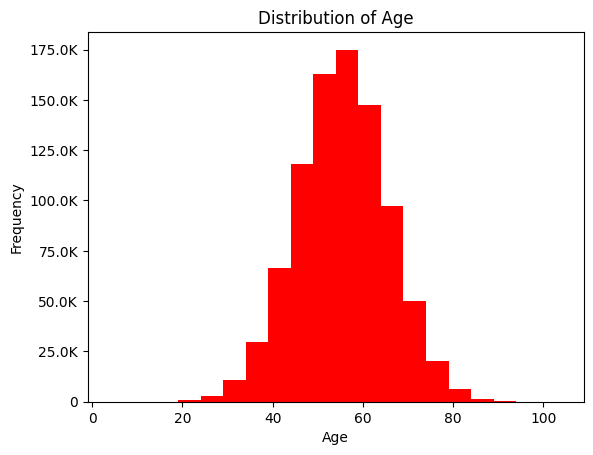

In [14]:
#visualization
#methods: pyspark_dist_explore
#toPandas(
#HandySpark
from pyspark_dist_explore import hist
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
hist(x=df_age, axis=ax, bins=20, color="red")
ax.set_title("Distribution of Age")
ax.set_xlabel("Age")
ax.set_ylabel("Frequency")

# 5. Display the plot
plt.show()

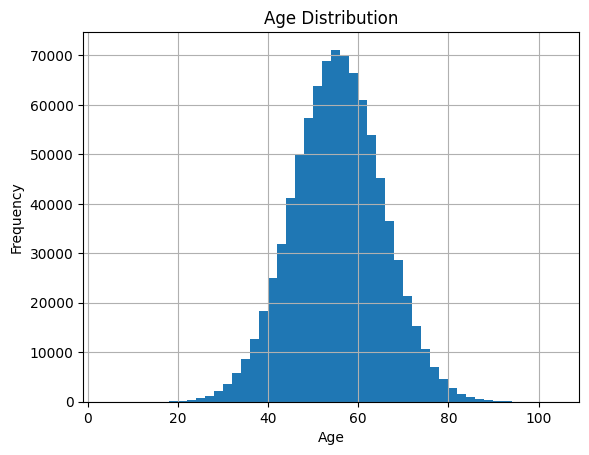

In [15]:
df_pandas = df.toPandas()

df_pandas['age'].hist(bins=50)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

In [16]:
#import handyspark
#hdf = df.toHandy()

#hdf.cols['age'].hist(bins=50)
#plt.title('Distribution of Price')
#plt.xlabel('Price')
#plt.ylabel('Frequency')
#plt.show()


In [17]:
# PySpark MLib 
#Collaborative filtering (recommender engines)
#Classification
#Clustering

from pyspark.mllib.recommendation import Rating

r = Rating(user = 1, product = 2, rating=5.0)

(r[0], r[1], r[2])  

(1, 2, 5.0)

In [18]:
data = sc.parallelize([1,2,3,4,5,6,7,8,9,10])
training, test = data.randomSplit([0.6, 0.4])
training.collect()
test.collect()

[2, 3, 4, 6, 7]

In [19]:
from pyspark.mllib.recommendation import ALS
r1 = Rating(1,1,1.0)
r2 = Rating(1,2, 2.0)
r3 = Rating(2,1, 2.0)
ratings = sc.parallelize([r1, r2, r3])
ratings.collect()


[Rating(user=1, product=1, rating=1.0),
 Rating(user=1, product=2, rating=2.0),
 Rating(user=2, product=1, rating=2.0)]

In [20]:
#Rating objects represented by (UserID, ItemID,Rating) tuples with training parameters rank and iterations
#Rank represents the num of features
# iteration represent the num of iterations to run the least squares computation
model = ALS.train(ratings, rank = 10, iterations = 10) 

In [21]:
#predictALL() method returns a list of predicted ratings for inpuit user and product pair

unrated_RDD = sc.parallelize([(1,2), (1,1)])

predictions = model.predictAll(unrated_RDD)
predictions.collect()

[Rating(user=1, product=1, rating=1.0000255067636963),
 Rating(user=1, product=2, rating=1.9890363752272087)]

In [22]:
rates = ratings.map(lambda x: ((x[0], x[1]), x[2]))
rates.collect()

[((1, 1), 1.0), ((1, 2), 2.0), ((2, 1), 2.0)]

In [23]:
pred = predictions.map(lambda x: ((x[0], x[1]), x[2]))
pred.collect()

[((1, 1), 1.0000255067636963), ((1, 2), 1.9890363752272087)]

In [24]:
rates_preds = rates.join(pred)
rates_preds.collect()

[((1, 1), (1.0, 1.0000255067636963)), ((1, 2), (2.0, 1.9890363752272087))]

In [25]:
MSE = rates_preds.map(lambda r: ([1][0] - r[1][1])**2).mean()

In [28]:
# two types of classification - binary and multi-class
# binary - two class, cancer of malignant type or not. Algorithms: 
# linera SVMs, logistic regression, decision trees, random forests, gradient-boosted, trees, naive bayes.

# multiclass classification - classify entities into more than two categories - what category a news article belong to.
# Algorithms: logistic regression, decision trees, random forests, naive bayes

#Vectors in pySpark Mlib
#Dense vector: store all their entries in an array of floating point numbers
#Sparse Vector: store only the nonzero values and their indices

from pyspark.mllib.linalg import Vectors
denseVec = Vectors.dense([1.0, 2.0, 3.0])
sparseVec = Vectors.sparse(4, {1: 1.0, 3: 5.5}) # Represents dense vector [0, 1.0, 0, 5.5] 
# Number in front tell us num of elements in vector, In dictionary only non-zero elements are mensioned to increase memmory efficiency

# LabeledPoint is a wrapper for input features and predicted value
# for binary classification of logistic regression, a label is either 0 (negative) or 1 (positive)
from pyspark.mllib.regression import LabeledPoint
positive = LabeledPoint(1.0, [1.0, 0.0, 3.0]) # label - 1, feature vector - [1.0, 0.0, 3.0]
negative = LabeledPoint(0.0, [2.0, 1.0, 1.0]) # label - 0, feature vector - [2.0, 1.0, 1.0]
print(positive)
print(negative)

(1.0,[1.0,0.0,3.0])
(0.0,[2.0,1.0,1.0])


In [35]:
# HashingTF() is used to map feature value to indices in the feature vector
from pyspark.mllib.feature import HashingTF
sentence = "hello hello world"
words = sentence.split()
tf = HashingTF(10000)
hashed_features = tf.transform(words)
print(hashed_features)

(10000,[1975,4725],[2.0,1.0])


In [36]:
from pyspark.mllib.classification import LogisticRegressionWithLBFGS
data = [
    LabeledPoint(0.0, [0.0, 1.0]),
    LabeledPoint(1.0, [1.0, 0.0])
]
RDD = sc.parallelize(data)

In [37]:
lrm = LogisticRegressionWithLBFGS.train(RDD)

In [39]:
print(lrm.predict([1.0, 0.0]))
print(lrm.predict([0.0, 1.0]))

1
0


In [ ]:
#cluistering - unsupervised learning method to group unlabeled data together
# models: k-means, gaussian mixture, power iteration clustering, bisecting k-means, streaming k-means

from pyspark.mllib.clustering import KMeans
model = KMeans.train(RDD, k = 2, maxIterations = 10)
model.clusterCenters #